<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Max_Path_Sum_In_Binary_Tree_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Max Path Sum In Binary Tree

Write a function that takes in a Binary Tree and returns its max path sum.

A path is a collection of connected nodes in a tree, where no node is connected to more than two other nodes; a path sum is the sum of the values of the nodes in a particular path.

Each `BinaryTree` node has an integer `value`, a `left` child node, and a `right` child node. Children nodes can either be `BinaryTree` nodes themselves or `None` / `null`.

Sample Input 

```
tree = 1
    /     \
   2       3
 /   \   /   \
4     5 6     7
```



Sample Output

```
18 // 5 + 2 + 1 + 3 + 7
```



In [ ]:
# Time O(n) : DFS all node in tree
# Space O(log(n)) : DFS call stack = depth of the tree (equal to lg n for balance tree)

def maxPathSum(tree):
	_, max_path_sum = find_max_path_sum(tree)
	return max_path_sum

def find_max_path_sum(tree):
	# solve trivial problem
	if tree == None:
		return (float('-inf'), float('-inf'))

	# devide problem
	left_child_max_path_sum_branch, left_child_max_path_sum_all = find_max_path_sum(tree.left)
	right_child_max_path_sum_branch, right_child_max_path_sum_all = find_max_path_sum(tree.right)
	child_max_path_sum_branch = max(left_child_max_path_sum_branch, right_child_max_path_sum_branch)


	# combine
  # compare all events of max path sum (more detial in conceptual note below)
	value = tree.value
	# max(4, 5, 6)
	max_path_sum_branch = max(left_child_max_path_sum_branch + value, right_child_max_path_sum_branch + value, value)


	# max((4, 5, 6), 1, 2, 3)
	max_path_sum_branch_all = max(max_path_sum_branch, left_child_max_path_sum_all, right_child_max_path_sum_all, left_child_max_path_sum_branch + value + right_child_max_path_sum_branch)
	
	return max_path_sum_branch, max_path_sum_branch_all

In [ ]:
class binary_tree():
  def __init__(self, value):
    self.value = value
    self.left = None
    self.right = None

In [ ]:
tree = binary_tree(1)
tree.left = binary_tree(2)
tree.right = binary_tree(3)
tree.right.left = binary_tree(6)
tree.right.right = binary_tree(7)
tree.left.left = binary_tree(5)
tree.left.right = binary_tree(4)

In [ ]:
print(maxPathSum(tree))

18


## Conceptual note

- We define all events of max path sum as shown in the picture below 
- compare to find max path sum of a root node of a subtree for 1. branch-type and 2. all-type
- brach-type is the one can be connect with its parent node to consider other max path sum
- While, all-type will not be consider with its parent node but we need to pass this information to the root node if it the max path sum

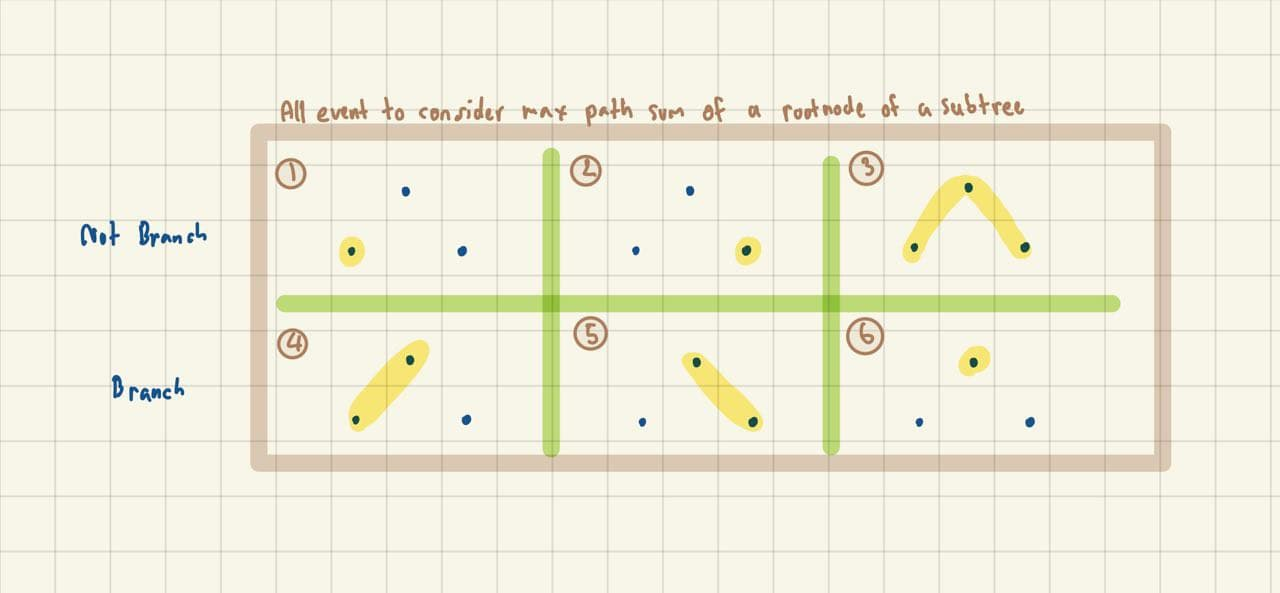